# Filter *.h5 files & background correction
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.

## Load cell.h5 files

Choose/insert a directory for the cell files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis.

In [1]:
from pySPT.widgets.widgetNotebooks import init_filter_notebook
from pySPT.widgets.widgetNotebooks import init_track_stats_widget_arrangement
from pySPT.widgets.widgetNotebooks import init_save_track_stats
from pySPT.widgets.widgetNotebooks import init_save_filtered_analysis
from pySPT.widgets import widgetLoadHdf5
from pySPT.widgets import loadHdf5
from pySPT.widgets import saveStatistics
from pySPT.widgets import saveFiltered
from pySPT.analysis import cell
from pySPT.analysis import trajectory
from pySPT.analysis import coverSlip
from pySPT.analysis import trajectoryStatistics
from tqdm import tqdm_notebook as tqdm
widget_load_hdf5 = widgetLoadHdf5.WidgetLoadHdf5()
load_hdf5 = loadHdf5.LoadHdf5()
cover_slip = coverSlip.CoverSlip()
track_stats = trajectoryStatistics.TrajectoryStatistics()
display(widget_load_hdf5.dir_box, widget_load_hdf5.dir_button)
widget_load_hdf5.dir_button.on_click(widget_load_hdf5.open_dir)
widget_load_hdf5.dir_box.observe(widget_load_hdf5.change_dir_box)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [2]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=True)
    track_stats.cells = cover_slip.cells
    track_stats.cell_trajectories = cover_slip.cell_trajectories
    track_stats.cell_sizes = [cell.size for cell in cover_slip.cells]
    #track_stats.calc_min_rossier_length()
    #widget_load_hdf5.min_length = track_stats.tau_threshold_min_length
display(widget_load_hdf5.init_cells_button)
widget_load_hdf5.init_cells_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

Initialization took 2.669764757156372 s


## Load background.h5 files

Choose/insert a directory for the background files to be searched in (e.g. F:\Marburg\single_colour_tracking\resting). All *.h5 files in the directory will be loaded for the analysis. Background correction is recommended but optional.

In [3]:
display(widget_load_hdf5.dir_box_bg, widget_load_hdf5.dir_button_bg)
widget_load_hdf5.dir_box_bg.observe(widget_load_hdf5.change_dir_box_bg)
widget_load_hdf5.dir_button_bg.on_click(widget_load_hdf5.open_dir_bg)

Text(value='directory to be searched in', description='directory', placeholder='Type something', style=Descrip…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [4]:
def initialize(event):
    init_filter_notebook(cover_slip, widget_load_hdf5, load_hdf5, is_cell=False)
    track_stats.backgrounds = cover_slip.backgrounds
    track_stats.background_trajectories = cover_slip.background_trajectories
    track_stats.bg_sizes = [background.size for background in cover_slip.backgrounds]
display(widget_load_hdf5.init_background_button)
widget_load_hdf5.init_background_button.on_click(initialize)

Button(description='initialize', style=ButtonStyle(), tooltip='initialize objects')

Initialization took 0.7841243743896484 s


## Filter for parameters

Floating point numbers have to be separated with a dot (e.g. 2.123). If no filter parameters or invalid parameters are given, the min and max values will be set automatically. All boxes that are checked will be included in the filtered data. If one wants to filter multiple times, the JNB has to be restarted.

In [13]:
def filter(event):
    #widget_load_hdf5.create_clear_output()
    track_stats.run_statistics(widget_load_hdf5.min_length_box.value, widget_load_hdf5.max_length_box.value, widget_load_hdf5.min_D_box.value, widget_load_hdf5.max_D_box.value, widget_load_hdf5.immob_type_check_box.value,  widget_load_hdf5.confined_type_check_box.value, widget_load_hdf5.free_type_check_box.value, widget_load_hdf5.analyse_successful_check_box.value, widget_load_hdf5.analyse_not_successful_check_box.value)
    track_stats.run_plot_diffusion_histogram(widget_load_hdf5.bin_size_box.value, plot=False)
#display(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_successful_check_box, widget_load_hdf5.analyse_not_successful_check_box, widget_load_hdf5.filter_button)
#widget_load_hdf5.min_length_box.observe(widget_load_hdf5.init_cells_button)
widget_load_hdf5.filter_button.on_click(filter)
init_track_stats_widget_arrangement(widget_load_hdf5.min_length_box, widget_load_hdf5.max_length_box, widget_load_hdf5.min_D_box, widget_load_hdf5.max_D_box, widget_load_hdf5.filter_button, widget_load_hdf5.immob_type_check_box, widget_load_hdf5.confined_type_check_box, widget_load_hdf5.free_type_check_box, widget_load_hdf5.analyse_successful_check_box, widget_load_hdf5.analyse_not_successful_check_box)

min trajectory length: 8
max trajectory length: 538
min diffusion coefficient: 1e-05 [μm²/s]
max diffusion coefficient: 2.4615554891102156 [μm²/s]
Initialization took 0.8997170925140381 s
15.8 % are immobile
35.3 % are confined
46.1 % are free
Trajectories included: 499
Trajectories excluded: 0
cell types % [(14.736842105263156, 37.54385964912281, 44.56140350877193), (17.289719626168225, 32.242990654205606, 48.13084112149533)]
cell count [285, 214]
index [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13

 0.56681838 0.         0.         0.         0.         0.50452006]
dcorr freq [0.01626809 0.         0.         0.         0.0012966  0.00030562
 0.         0.         0.00061123 0.00030562 0.00030562 0.
 0.         0.00043982 0.00191214 0.00069795 0.00140049 0.00061123
 0.00259321 0.00091685 0.00068589 0.00070255 0.00504954 0.00251573
 0.00366849 0.00487466 0.0013741  0.0015542  0.00258825 0.0003214
 0.00631977 0.00597385 0.00043254 0.00159569 0.00127028 0.00536679
 0.00627483 0.00438217 0.00852463 0.00092335 0.00601736 0.00532594
 0.00941224 0.01198855 0.00788694 0.0040863  0.00219874 0.00094888
 0.00283133 0.         0.         0.         0.         0.00252014]
dcorr freq% [3.25678999 0.         0.         0.         0.2595736  0.06118276
 0.         0.         0.12236552 0.06118276 0.06118276 0.
 0.         0.08805013 0.38279996 0.13972628 0.28037197 0.12236552
 0.5191472  0.18354827 0.13731132 0.14064604 1.01089332 0.50363605
 0.73441313 0.9758823  0.27508795 0.31114368 0.5181538

       [ 3.00000000e-01,  0.00000000e+00]])]
diffusion freq [[0.01887555 0.04284244]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.00252014]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.00188755 0.00252014]
 [0.00377511 0.        ]
 [0.00377511 0.00252014]
 [0.         0.00252014]
 [0.         0.        ]
 [0.         0.00504029]
 [0.         0.        ]
 [0.00566266 0.00504029]
 [0.00377511 0.00504029]
 [0.         0.01008057]
 [0.00943777 0.00504029]
 [0.00943777 0.00252014]
 [0.00943777 0.        ]
 [0.00377511 0.00252014]
 [0.00755022 0.00504029]
 [0.00755022 0.00252014]
 [0.00943777 0.01008057]
 [0.01510044 0.00252014]
 [0.01698799 0.00504029]
 [0.01321288 0.01260072]
 [0.01321288 0.01008057]
 [0.01510044 0.01764101]
 [0.01698799 0.02772158]
 [0.03775109 0.02520144]
 [0.0415262  0.

 1.58489319e+00 1.99526231e+00]
normalization factor corr 200.19496434494226
corr freq [0.01191081 0.         0.         0.         0.00095446 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00189823 0.00158194 0.00223078 0.00064884 0.
 0.00129768 0.         0.00474024 0.00226839 0.00351221 0.00540533
 0.00353403 0.00349642 0.00131393 0.00476717 0.00381272 0.00914794
 0.00819906 0.01101414 0.01260118 0.01134111 0.01637072 0.02235479
 0.03147626 0.03714403 0.03683795 0.03116508 0.04156752 0.03808781
 0.0472144  0.03841432 0.02487493 0.00912658 0.00723903 0.00661155
 0.00283133 0.         0.         0.         0.         0.00252014]
corr freq % [2.38448417 0.         0.         0.         0.19107727 0.
 0.         0.         0.         0.         0.         0.
 0.         0.38001673 0.31669616 0.44659068 0.12989452 0.
 0.25978903 0.         0.94897293 0.45411968 0.70312634 1.08212082
 0.70749527 0.69996627 0.26304241 0.95436412 0.76328684 1.83137191
 1.6414102

       [ 3.00000000e-01,  0.00000000e+00]])]
diffusion freq [[0.01887555 0.04284244]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.00252014]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.00188755 0.00252014]
 [0.00377511 0.        ]
 [0.00377511 0.00252014]
 [0.         0.00252014]
 [0.         0.        ]
 [0.         0.00504029]
 [0.         0.        ]
 [0.00566266 0.00504029]
 [0.00377511 0.00504029]
 [0.         0.01008057]
 [0.00943777 0.00504029]
 [0.00943777 0.00252014]
 [0.00943777 0.        ]
 [0.00377511 0.00252014]
 [0.00755022 0.00504029]
 [0.00755022 0.00252014]
 [0.00943777 0.01008057]
 [0.01510044 0.00252014]
 [0.01698799 0.00504029]
 [0.01321288 0.01260072]
 [0.01321288 0.01008057]
 [0.01510044 0.01764101]
 [0.01698799 0.02772158]
 [0.03775109 0.02520144]
 [0.0415262  0.

## Choose trajectory to plot

Choose a cell. If one wants to plot multiple times, choose a new cell and/or trajectory reload the plotting cell by clicking in the cell and pressing strg+enter.

In [6]:
def dropdown(event):
    widget_load_hdf5.cell_options = widget_load_hdf5.get_cell_names(cover_slip.cells, track_stats.cell_trajectories_filtered)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_cells)

Dropdown(description='Number:', options=(), value=None)

Choose a trajectory.

In [7]:
def dropdown(event):      
    for cell in cover_slip.cells:
        if cell.name == widget_load_hdf5.drop_down_cells.value:
            target_cell = cover_slip.cells.index(cell)
            widget_load_hdf5.trajectory_options = track_stats.cell_trajectories_filtered_index[target_cell]
            widget_load_hdf5.drop_down_trajectories.options = widget_load_hdf5.trajectory_options
widget_load_hdf5.drop_down_cells.observe(dropdown)
widget_load_hdf5.filter_button.on_click(dropdown)
display(widget_load_hdf5.drop_down_trajectories)

Dropdown(description='Number:', options=(), value=None)

In [8]:
def plot_trajectory(event):
    widget_load_hdf5.create_clear_output()
    cover_slip.plot_trajectory(widget_load_hdf5.drop_down_cells.value, widget_load_hdf5.drop_down_trajectories.value)
display(widget_load_hdf5.plot_button)
widget_load_hdf5.plot_button.on_click(plot_trajectory)

Button(description='plot', style=ButtonStyle(), tooltip='plot chosen trajectory')

## Plot diffusion histogram

In [9]:
display(widget_load_hdf5.bin_size_box)

Text(value='0.1', description='bin size', placeholder='size for log10(D) histogram', style=DescriptionStyle(de…

freq, no % [0.03085899 0.         0.         0.         0.00126007 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00220385 0.00188755 0.00314763 0.00126007 0.
 0.00252014 0.         0.00535148 0.0044077  0.00504029 0.00723903
 0.00597896 0.00471889 0.00314763 0.00629525 0.00503518 0.00975917
 0.00881029 0.01101414 0.0129068  0.01164673 0.01637072 0.02235479
 0.03147626 0.03714403 0.03683795 0.03116508 0.04187313 0.03808781
 0.0472144  0.03841432 0.02487493 0.00912658 0.00723903 0.00661155
 0.00283133 0.         0.         0.         0.         0.00252014]
SUMME 0.5386318949304257
normalization factor 185.65554869883235
mean cell freq [0.03085899 0.         0.         0.         0.00126007 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00220385 0.00188755 0.00314763 0.00126007 0.
 0.00252014 0.         0.00535148 0.0044077  0.00504029 0.00723903
 0.00597896 0.00471889 0.00314763 0.00629525 0.00503518 0.00975917
 0.00881029 0.0110

       [ 3.00000000e-01,  5.04028727e-03]])]
BG [array([[-5.00000000e+00,  2.99503551e-02],
       [-4.90000000e+00,  0.00000000e+00],
       [-4.80000000e+00,  0.00000000e+00],
       [-4.70000000e+00,  0.00000000e+00],
       [-4.60000000e+00,  6.11231736e-04],
       [-4.50000000e+00,  6.11231736e-04],
       [-4.40000000e+00,  0.00000000e+00],
       [-4.30000000e+00,  0.00000000e+00],
       [-4.20000000e+00,  0.00000000e+00],
       [-4.10000000e+00,  0.00000000e+00],
       [-4.00000000e+00,  1.22246347e-03],
       [-3.90000000e+00,  0.00000000e+00],
       [-3.80000000e+00,  0.00000000e+00],
       [-3.70000000e+00,  0.00000000e+00],
       [-3.60000000e+00,  0.00000000e+00],
       [-3.50000000e+00,  1.22246347e-03],
       [-3.40000000e+00,  1.22246347e-03],
       [-3.30000000e+00,  1.83369521e-03],
       [-3.20000000e+00,  1.83369521e-03],
       [-3.10000000e+00,  2.44492694e-03],
       [-3.00000000e+00,  1.22246347e-03],
       [-2.90000000e+00,  1.83369521e-03],
     

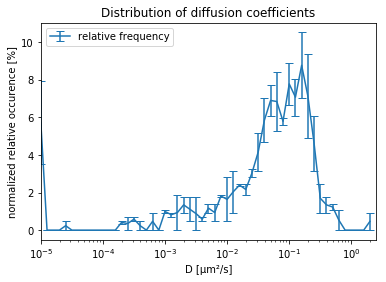

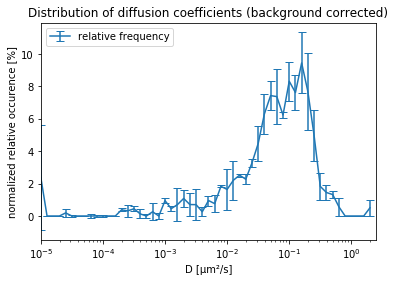

In [14]:
def plot_diffusions(event):
    widget_load_hdf5.create_clear_output()
    track_stats.run_plot_diffusion_histogram(widget_load_hdf5.bin_size_box.value)
display(widget_load_hdf5.plot_diffusions_button)
widget_load_hdf5.plot_diffusions_button.on_click(plot_diffusions)

## Save Analysis

Choose a directory, folder name and a file name for the statistics h5 file. If you want to save the filtered dataset, check the box! The filtered dataset will be saved in the same folder as the statistics h5 file.

In [11]:
display(widget_load_hdf5.save_dir_button, widget_load_hdf5.save_dir_box, widget_load_hdf5.save_folder_name_box, widget_load_hdf5.save_name_box, widget_load_hdf5.filtered_dataset_checkbox)
widget_load_hdf5.save_dir_button.on_click(widget_load_hdf5.save_open_dir)
widget_load_hdf5.save_dir_box.observe(widget_load_hdf5.change_save_dir_box)

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

Text(value='', description='directory', placeholder='directory for filtered data', style=DescriptionStyle(desc…

Text(value='190315_filtered', description='folder name', placeholder='name of folder', style=DescriptionStyle(…

Text(value='statistics', description='file name', placeholder='name for statistics .h5 file', style=Descriptio…

Checkbox(value=True, description='Save filtered dataset')

In [12]:
def save(event):
    print("0")
    #widget_load_hdf5.save_button.close()
    widget_load_hdf5.create_clear_output()
    display(widget_load_hdf5.save_button) 
    h5_stats = saveStatistics.SaveStatistics()
    print("1")
    if widget_load_hdf5.save_dir_box.value:
        print("2")
        init_save_track_stats(h5_stats, track_stats, widget_load_hdf5.save_dir_box.value, widget_load_hdf5.save_folder_name_box.value, widget_load_hdf5.save_name_box.value)
        print("3")
        if widget_load_hdf5.filtered_dataset_checkbox.value:
            print("4")
            for cell_index in range(len(track_stats.cells)):
                print("5")
                if track_stats.cell_trajectories_filtered[cell_index]:
                    print("6")
                    init_save_filtered_analysis(cover_slip, cell_index, track_stats, widget_load_hdf5.save_dir_box.value, widget_load_hdf5.save_folder_name_box.value)
                    print("7")
    else:
        print("Please choose a directory")
display(widget_load_hdf5.save_button) 
widget_load_hdf5.save_button.on_click(save)
print("00")

Button(description='save', style=ButtonStyle(), tooltip='save statistics')

00
